<a id='problemsize'></a>
# Problemsize
### How does the problem size influence execution time, speed-up and efficiency for a fix amount of threads ?

In this notebook we do almost the same as we did in the Notebook called 'overhead'. The difference is that we ask a different question. In the notebook about overhead we asked: "How large does the problem size has to be, so that parallelism is worth using (speed-up larger than 1)?". 

This notebook on the other hand is meant to help you with analysis in 'weak scaling'. The question we ask is: "Can we increase speed-up and efficiency by increasing the problem size?". Since we are doing measurements with rather big problem sizes, I included only a small amount of measurements. Feel free to add more measurements if you want.

In the first half of this notebook we make our calculations based on the program, which measures execution time on the algorithm only. In the second half we make the exact same calculations, but we measure the execution time of the entire program. 

### Which program do you want to test ?

In the following code line, replace the last word `matrixmultiplication` with the program name you want to test. Then run all the code lines (and be very patient). You may want to adjust the values for problemsize, depending on what program you are testing.

I give you quick summary of all the programs you can choose from. In the table below you can also see what the problem size is and what the default value for problem size is set to. Note that with all the programs you have the option to give just one value for problem size. In the program fibonacci for example you can either pass two values for the start and end of the interval; or you just pass one value, in which case the start will be set to 0. In the mandelbrot program the width of the picture will be set to the height if you pass only one value. The same is the case for the grid dimension of the jacobi matrix. 

| program | problemsize | default |
| :- | :- | :- |
| pi | number of intervals | 150'000'000 |
| jacobi | grid dimension | 100, 100 |
| fibonacci | n'th element of the fibonacci sequence | 40 |
| findprime | interval during which prime numbers are searched | 0, 1'000'000 |
| mandelbrot | dimensions of the mandelbrot picture | 1080, 1920 |
| quicksort | length of list to be sorted | 1'000'000 |
| mergesort | length of list to be sorted | 1'000'000 |
| bubblesort | length of list to be sorted | 10'000 |
| selectionsort | length of list to be sorted | 10'000 |
| matrixmultiplication | dimension of the matrices | 500 |

You can also test your own program. Check the readme file to find out how to do this.

In [2]:
%cd ~/performance/programs/matrixmultiplication

/home/jovyan/performance/programs/matrixmultiplication


In [3]:
import numpy as np

problemsize = np.array([320,640,960,1280]) 
threads = 32

You have to manually adjust the time measurements in the following code cell, so it measures with the problem size and thread number you decided on. The values you set for the variables 'threads' and 'problem_size' in the previous code cell have to match the values you pass as arguments in the following code cell. Remember, the first argument you pass is the thread number, the second argument is the number of repeats, and the third argument (and any following arguments) is the problem size. You have to type out the full number in the terminal command; something like '1e5*8' will not work. `>/dev/null` suppresses the terminal output.

### Measuring Elapsed Time on the Algorithm Only

In [4]:
# parallel time
time_parallel = []
time_serial = []

! ./timing.o 32 5 320 >/dev/null
time_parallel.append(np.genfromtxt('/tmp/time.txt'))
! ./timing.o 1 5 320 >/dev/null
time_serial.append(np.genfromtxt('/tmp/time.txt'))

! ./timing.o 32 5 640 >/dev/null
time_parallel.append(np.genfromtxt('/tmp/time.txt'))
! ./timing.o 1 5 640 >/dev/null
time_serial.append(np.genfromtxt('/tmp/time.txt'))

! ./timing.o 32 5 960 >/dev/null
time_parallel.append(np.genfromtxt('/tmp/time.txt'))
! ./timing.o 1 5 960 >/dev/null
time_serial.append(np.genfromtxt('/tmp/time.txt'))
 
! ./timing.o 32 5 1280 >/dev/null
time_parallel.append(np.genfromtxt('/tmp/time.txt'))
! ./timing.o 1 5 1280 >/dev/null
time_serial.append(np.genfromtxt('/tmp/time.txt'))

In [5]:
# calculate speedup and efficiency
speedup = np.array(time_serial)/np.array(time_parallel)
efficiency = speedup/threads

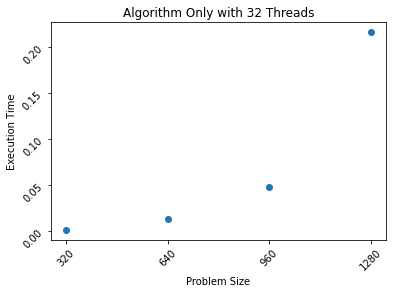

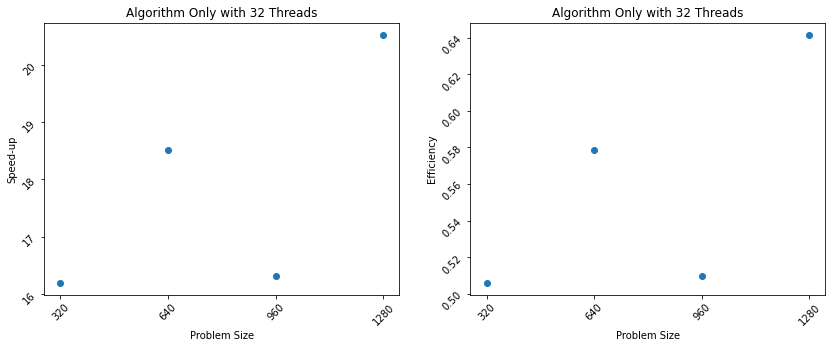

In [6]:
# plot results
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize=(6,4))
ax.scatter(problemsize,time_parallel)
ax.set_xticks(problemsize)
ax.set_xticklabels(problemsize)
ax.set_ylabel('Execution Time')
ax.set_xlabel('Problem Size')
ax.set_title("Algorithm Only with " + str(threads)+' Threads')
ax.tick_params(rotation=45)

fig,ax = plt.subplots(1,2,figsize=(14,5))
ax[0].scatter(problemsize,speedup)
ax[0].set_xticks(problemsize)
ax[0].set_xticklabels(problemsize)
ax[0].set_ylabel('Speed-up')
ax[0].set_xlabel('Problem Size')
ax[0].set_title("Algorithm Only with " + str(threads)+' Threads')
ax[0].tick_params(rotation=45)

ax[1].scatter(problemsize,efficiency)
ax[1].set_xticks(problemsize)
ax[1].set_xticklabels(problemsize)
ax[1].set_ylabel('Efficiency')
ax[1].set_xlabel('Problem Size')
ax[1].set_title("Algorithm Only with " + str(threads)+' Threads')
ax[1].tick_params(rotation=45);

### Measuring Elapsed Time of the Full Program Run

In [7]:
import numpy as np

problemsize2 = np.array([320,640,960,1280]) 
threads2 = 32

You have to manually adjust the time measurements in the following code cell, so it measures with the problem size and thread number you decided on. The values you set for the variables 'threads' and 'problem_size' in the previous code cell have to match the values you pass as arguments in the following code cell. Remember, the first argument you pass is the thread number and the second argument (and any following arguments) is the problem size. You have to type out the full number in the terminal command; something like '1e5*8' will not work. `>/dev/null` suppresses the terminal output.

In [8]:
# of full programm run: measure time with repeats=5

# parallel time
time_parallel2 = []
time_serial2 = []

timeit_object = %timeit -o -n 5 -r 1 -q ! ./notiming.o 32 320 >/dev/null
time_parallel2.append(timeit_object.best)
timeit_object = %timeit -o -n 5 -r 1 -q ! ./notiming.o 1 320 >/dev/null
time_serial2.append(timeit_object.best)

timeit_object = %timeit -o -n 5 -r 1 -q ! ./notiming.o 32 640 >/dev/null
time_parallel2.append(timeit_object.best)
timeit_object = %timeit -o -n 5 -r 1 -q ! ./notiming.o 1 640 >/dev/null
time_serial2.append(timeit_object.best)

timeit_object = %timeit -o -n 5 -r 1 -q ! ./notiming.o 32 960 >/dev/null
time_parallel2.append(timeit_object.best)
timeit_object = %timeit -o -n 5 -r 1 -q ! ./notiming.o 1 960 >/dev/null
time_serial2.append(timeit_object.best)

timeit_object = %timeit -o -n 5 -r 1 -q ! ./notiming.o 32 1280 >/dev/null
time_parallel2.append(timeit_object.best)
timeit_object = %timeit -o -n 5 -r 1 -q ! ./notiming.o 1 1280 >/dev/null
time_serial2.append(timeit_object.best)

In [9]:
# calculate speedup and efficiency
speedup2 = np.array(time_serial2)/np.array(time_parallel2)
efficiency2 = speedup2/threads2

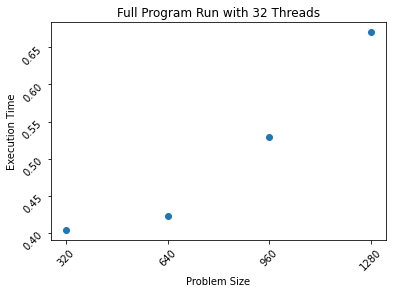

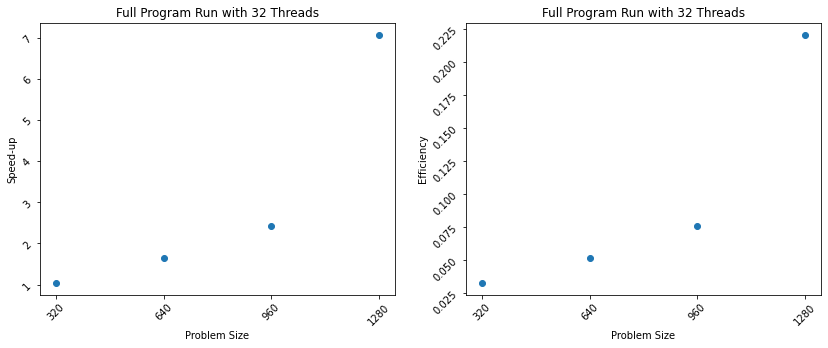

In [10]:
# plot results
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize=(6,4))
ax.scatter(problemsize2,time_parallel2)
ax.set_xticks(problemsize2)
ax.set_xticklabels(problemsize2)
ax.set_ylabel('Execution Time')
ax.set_xlabel('Problem Size')
ax.set_title("Full Program Run with " + str(threads2)+' Threads')
ax.tick_params(rotation=45)

fig,ax = plt.subplots(1,2,figsize=(14,5))
ax[0].scatter(problemsize2,speedup2)
ax[0].set_xticks(problemsize2)
ax[0].set_xticklabels(problemsize2)
ax[0].set_ylabel('Speed-up')
ax[0].set_xlabel('Problem Size')
ax[0].set_title("Full Program Run with " + str(threads2)+' Threads')
ax[0].tick_params(rotation=45)

ax[1].scatter(problemsize2,efficiency2)
ax[1].set_xticks(problemsize2)
ax[1].set_xticklabels(problemsize2)
ax[1].set_ylabel('Efficiency')
ax[1].set_xlabel('Problem Size')
ax[1].set_title("Full Program Run with " + str(threads2)+' Threads')
ax[1].tick_params(rotation=45);